# Marche aléatoire 2D

In [1]:
import matplotlib.pyplot as plt
import numpy
import random

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [2]:
def marche_aleatoire(N, p, r=0, deplacements=[]):# deplacements enregistre l'évolution de la marche. Par défaut, on a fait aucun deplacement
    if N == 0:
        return 0, []
    else:
        rn, deplacements = marche_aleatoire(N - 1, p, r, deplacements)
        deplacements.append(rn)
        if random.random() < p:
            if rn != N:# on bloque dès lors qu'on est sur les extrémités
                rn += 1
        else:
            if rn!= 0:
                rn-= 1
        return rn, deplacements


In [3]:
print("marche 1D : ", marche_aleatoire(5, 0.8))

marche 1D :  (1, [0, 0, 0, 1, 2])


In [4]:
def monte_carlo(M, N, p):
    resultat = []
    for i in range(M):# on fait M fois l'opération
        rn, deplacements = marche_aleatoire(N, p)
        resultat.append(rn)
    return resultat

In [5]:
print("Monte Carlo : ", monte_carlo(10, 100, 0.8))

Monte Carlo :  [64, 54, 46, 69, 60, 66, 56, 53, 60, 62]


In [6]:
def statistiques(M, N, p):
    r = monte_carlo(M, N, p)
    moyenne = numpy.mean(r)
    ecart_type = numpy.std(r)
    return [moyenne, ecart_type]

In [7]:
print("Statistiques [moyenne, ecart type] : ", statistiques(10, 100, 0.8))

Statistiques [moyenne, ecart type] :  [62.6, 7.605261336732617]


In [8]:
def affiche_marche_1D(N, p):
    Y = [i for i in range(N + 1)]
    rn, deplacements = marche_aleatoire(N, p)
    X = deplacements + [rn]
    plt.plot(X, Y)# affiche une marche aléatoire dans son ensemble
    plt.title("Evolution de la marche aléatoire 1D")
    plt.xlabel("progression de la marhe aléatoire")
    plt.ylabel("temps")
    plt.show()

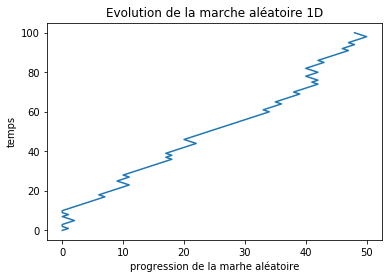

In [9]:
affiche_marche_1D(100, 0.8)

In [10]:
def affiche_montecarlo(M, N, p):# affiche l'histogramme des marches aléatoires enregistrées
    mc = monte_carlo(M, N, p)
    plt.hist(mc, bins=50)
    plt.boxplot(mc, vert=False, widths=5)# affiche l'histogramme des marches aléatoires enregistrées
    plt.title("Points d'arrivée de {} marches aléatoire 1D\nDiffusion de 0 vers {}".format(M, N))
    plt.xlabel("Déplacement sur 1 dimension")
    plt.ylabel("Nombre d'occurences")
    plt.show()

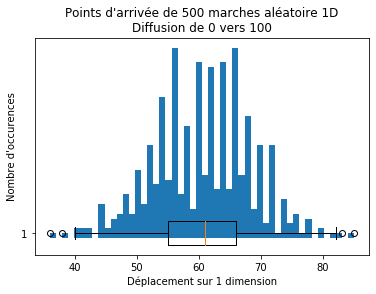

In [11]:
affiche_montecarlo(500, 100, 0.8)

In [15]:
def marche_aleatoire_2D(N, p):
    r1, d1 = marche_aleatoire(N, p)
    r2, d2 = marche_aleatoire(N, p)
    X = d1 + [r1]
    Y = d2 + [r2]
    return X, Y

In [18]:
def affiche_marche_2D(nb_pas, N, p):
    X, Y = marche_aleatoire_2D(N, p)
    plt.plot(X, Y)
    plt.title("Représentation d'une marche aléatoire 2D \nsur un domaine {} x {} en partant de (0, 0)".format(N,N))
    plt.show()

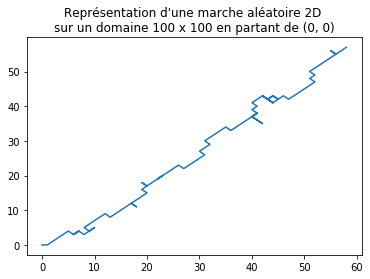

In [19]:
affiche_marche_2D(100, 100, 0.8)

In [20]:
def marche_aleatoire_2D_corrigee(nb_pas, N, p):# on avance de nb_pas sur un domaine N x N
    if nb_pas == 0:
        return [0], [0]
    else:
        X, Y = marche_aleatoire_2D_corrigee(nb_pas - 1, N, p)# appel recursif
        direction = random.choice([True, False])# on choisit la direction de propagation
        if random.random() < p:# on choisit le pas sur la direction choisie
            pas = 1
        else:
            pas = -1

        if direction:# selon la direction : on fait avancer selon x
            pas *= 1 - ((X[-1] == 0 and pas == -1) or (X[-1] == N and pas == 1))# vérifie que l'on est pas au bord, dans quel cas le pas est multiplié par 0
            X.append(X[-1] + pas)
            Y.append(Y[-1])
        else:# ou selon y
            pas *= 1 - ((Y[-1] == 0 and pas == -1) or (Y[-1] == N and pas == 1))# ici aussi
            Y.append(Y[-1] + pas)
            X.append(X[-1])
        return X, Y

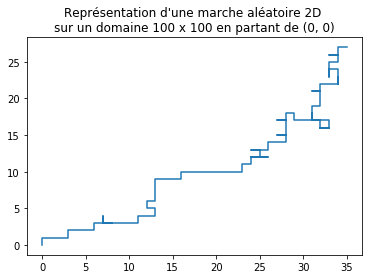

In [22]:
def affiche_marche_2D_2(nb_pas, N, p):
    X, Y = marche_aleatoire_2D_corrigee(nb_pas, N, p)
    plt.plot(X, Y)
    plt.title("Représentation d'une marche aléatoire 2D \nsur un domaine {} x {} en partant de (0, 0)".format(N,N))
    plt.show()
affiche_marche_2D_2(100, 100, 0.8)